**Import Libraries**

In [3]:
import tensorflow as tf 
import tensorflow_datasets as tfds 
from tensorflow import keras
from keras import Sequential

**Load Data**

In [5]:
BUFFER_SIZE = 70000
BATCH_SIZE = 128 
NUM_EPOCHS = 20

In [6]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

In [7]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [8]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.

    return image, label

**Split Data To Train, Validation and Test**

In [10]:
train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [11]:
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

In [12]:
num_test_samples = 0.1 * mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [13]:
train_and_validation_data = train_and_validation_data.shuffle(BUFFER_SIZE)

In [14]:
train_data = train_and_validation_data.skip(num_validation_samples)
validation_data = train_and_validation_data.take(num_validation_samples)

In [15]:
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

**Creating the model and training it**

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, 5, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary(line_length = 75)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                │ (None, 24, 24, 50)      │        1,300 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)   │ (None, 12, 12, 50)      │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)              │ (None, 10, 10, 50)      │       22,550 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ max_pooling2d_1 (MaxPooling2D) │ (None, 5, 5, 50)        │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ flatten (Flatten)              │ (None, 1250)            │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense (Dense)                  │ (None, 10)              │       12,510 │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 36,360 (142.03 KB)

 Trainable params: 36,360 (142.03 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [20]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor ='val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 2,
    verbose = 0,
    restore_best_weights = True
)

In [22]:
model.fit(
    train_data,
    epochs = NUM_EPOCHS,
    callbacks = [early_stopping],
    validation_data = validation_data,
    verbose = 2
)

Epoch 1/20
422/422 - 14s - 34ms/step - accuracy: 0.9268 - loss: 0.2718 - val_accuracy: 0.9697 - val_loss: 0.0987
Epoch 2/20
422/422 - 13s - 30ms/step - accuracy: 0.9786 - loss: 0.0736 - val_accuracy: 0.9803 - val_loss: 0.0603
Epoch 3/20
422/422 - 13s - 30ms/step - accuracy: 0.9841 - loss: 0.0534 - val_accuracy: 0.9860 - val_loss: 0.0450
Epoch 4/20
422/422 - 14s - 32ms/step - accuracy: 0.9875 - loss: 0.0418 - val_accuracy: 0.9897 - val_loss: 0.0319
Epoch 5/20
422/422 - 12s - 28ms/step - accuracy: 0.9888 - loss: 0.0375 - val_accuracy: 0.9917 - val_loss: 0.0287
Epoch 6/20
422/422 - 11s - 27ms/step - accuracy: 0.9909 - loss: 0.0305 - val_accuracy: 0.9900 - val_loss: 0.0309
Epoch 7/20
422/422 - 12s - 28ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9948 - val_loss: 0.0200
Epoch 8/20
422/422 - 11s - 27ms/step - accuracy: 0.9933 - loss: 0.0221 - val_accuracy: 0.9948 - val_loss: 0.0176
Epoch 9/20
422/422 - 10s - 24ms/step - accuracy: 0.9929 - loss: 0.0207 - val_accuracy: 0.9940 - 

**Test data**

In [24]:
#testing our model
test_loss, test_accuracy = model.evaluate(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9915 - loss: 0.0287


In [25]:
#printing the test accuracy
print('test loss: {0: .4f}. Test accuracy: {0: .2f}%'.format(test_loss, test_accuracy*100.))

test loss:  0.0296. Test accuracy:  0.03%


**Plotting images and the result**

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Split the test_data into 2 arrays, containing the images and the corresponding labels
for images, labels in test_data.take(1):
    images_test = images.numpy()
    labels_test = labels.numpy()

# Reshape the images into 28x28 form, suitable for matplotlib (original dimensions: 28x28x1)
images_plot = np.reshape(images_test, (1000,28,28))

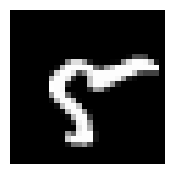

Label: 5


In [41]:
# The image to be displayed and tested
i = 502


# Plot the image
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(images_plot[i-1], cmap="gray", aspect='auto')
plt.show()

# Print the correct label for the image
print("Label: {}".format(labels_test[i-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<BarContainer object of 10 artists>

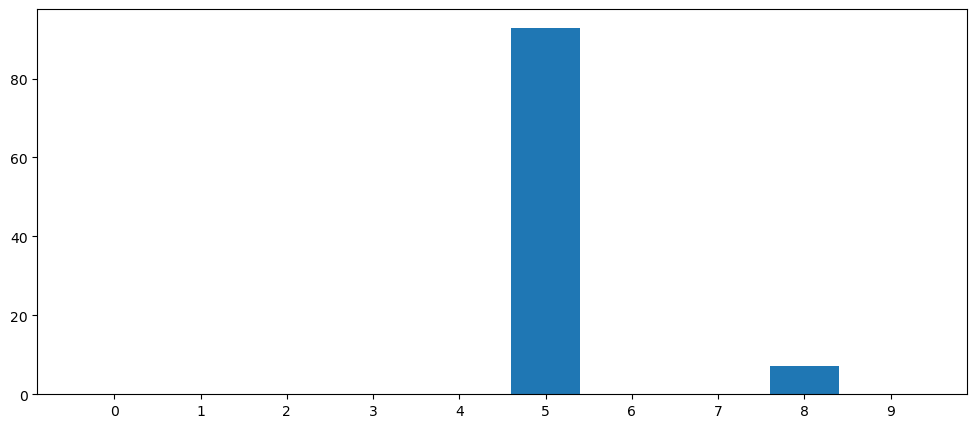

In [43]:
# Obtain the model's predictions (logits)
predictions = model.predict(images_test[i-1:i])

# Convert those predictions into probabilities (recall that we incorporated the softmaxt activation into the loss function)
probabilities = tf.nn.softmax(predictions).numpy()
# Convert the probabilities into percentages
probabilities = probabilities*100


# Create a bar chart to plot the probabilities for each class
plt.figure(figsize=(12,5))
plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=probabilities[0], tick_label=["0","1","2","3","4","5","6","7","8","9"])